# TE Image processing

Import the necessary modules and activate inline plotting.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define two functions for displaying images and plotting histograms.

In [2]:
def show(img):
    # check if the image is color (dim=3) or black and white (dim=2)
    if len(img.shape)==3:
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plot = plt.imshow(img2)
    else:
        plot = plt.imshow(img, cmap='gray')
    # place the x-axis labels at the top
    plt.tick_params(bottom=False, top=True, labelbottom=False, labeltop=True)

In [3]:
def histogram(hist, title):
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()

## 6 Image processing

(300, 300, 3)


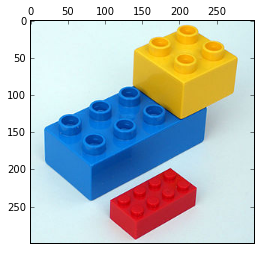

In [4]:
img = cv2.imread("bricks.jpg")
print(img.shape)
show(img)

What is the BGR value of pixle at position p0 = (100, 200)?

p0 = (100, 200) the BGR value is (225,0,0) blue


Make a copy of `img` and add a red circle of with center=p0, radius=20, and thickness=2.

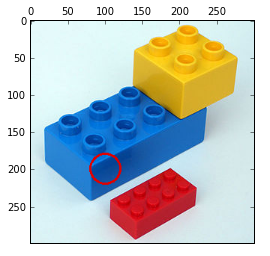

In [7]:
img2 = img.copy()
cv2.circle(img2, (100,200), 20, (0,0,225), 2)
show(img2)

## 7 Histograms

Transform the color image to a gray-scale image and show it.

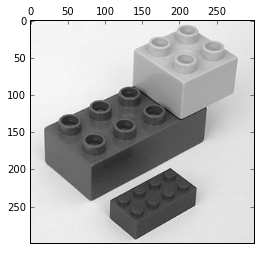

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(gray)

Show a false-color image to better read the gray-scale values.

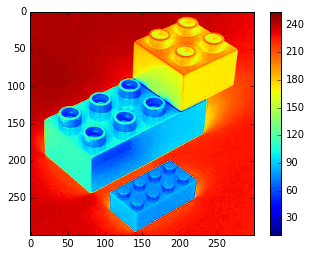

In [21]:
plot = plt.imshow(gray)
plt.colorbar();

Create a histogramm for the grayscale image `gray`.

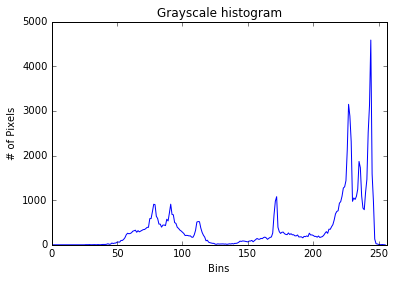

In [80]:
hist = cv2.calcHist([gray], [0], None, [256], [0,256])
histogram(hist, "Grayscale histogram")

Look at the false-color grayscale image and explain the seven peaks at 
- 75   correspond à la brique rouge
- 90   correspond à la brique bleue
- 110  correspond à l'ombre à l interieur des cercles de la brique bleue
- 170  correspond à la brique jaune
- 220  correspond au fond blanchatre de l image en bas
- 230  corresond aux contours des cercles sur la brique jaune
- 240  correspond au fond blanchatre de l image en haut

## Split into RGB colors

Split the image into its 3 color components (b, g, r). Show b.

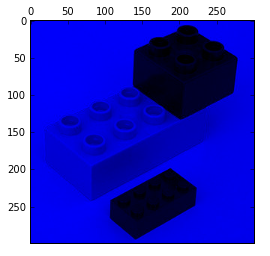

In [44]:
(b, g, r) = cv2.split(img)
zeros = np.zeros(img.shape[:2], dtype = "uint8")
imgB = cv2.merge([b, zeros, zeros])
show(imgB)

Horizontally stack the 3 images (b, g, r) and call the result `bgr`.

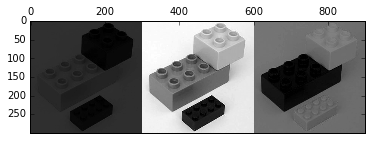

In [77]:
stack = np.hstack([
    cv2.merge([b, zeros, zeros]),
    cv2.merge([zeros, g, zeros]),
    cv2.merge([zeros, zeros, r])
])
bgr = cv2.cvtColor(stack, cv2.COLOR_BGR2GRAY)
show(bgr)

Create a zero-filled np.array `z` whith the same dimensions as `gray`. Use it to create a 
- blue imgage B from b
- green image G from g
- red image R from r

Horizontally stack the (B, G, R) images and call the result `BGR`.

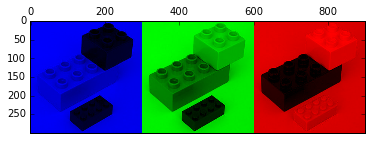

In [76]:
BGR = np.hstack([
    cv2.merge([b, zeros, zeros]),
    cv2.merge([zeros, g, zeros]),
    cv2.merge([zeros, zeros, r])
])
show(BGR)

## 8 Smoothing

Extract a 80x80 region at point (100, 80) and call it `img2`

(80, 80, 3)


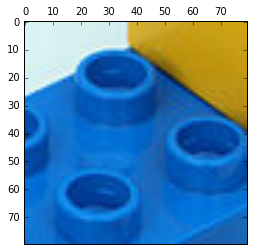

In [31]:
img2 = img[80:160, 100:180]
show(img2)
print(img2.shape)

Show 3 horizontally stacked Gaussian blurred images of `img2` with a blur size of 3, 5, 7

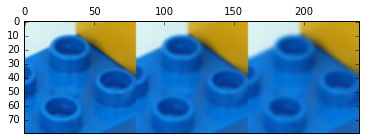

In [32]:
blurred = np.hstack([
    cv2.GaussianBlur(img2, (3,3), 0),
    cv2.GaussianBlur(img2, (5,5), 0),
    cv2.GaussianBlur(img2, (7,7),0)
])
show(blurred)

## 9 Thresholding

Use the blue component `b` of the image and compute the inverse binary with a simple threshold of T=100, to obtain a mask which only shows the yellow and the red brick.

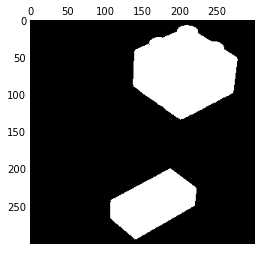

In [62]:
(T, thresh) = cv2.threshold(b, 100, 225, cv2.THRESH_BINARY_INV)
show(thresh)

Use `bitwise_and` to show only the red and yellow brick.

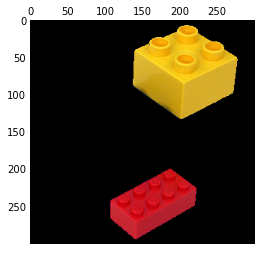

In [64]:
bitwise_and = cv2.bitwise_and(img, img, mask = thresh)
show(bitwise_and)

## 10 Edge detection

The blue color component `b` has the higest image contrast. So we use this image for edge detection of the yellow and red brick.

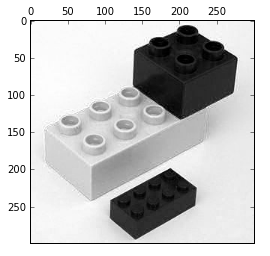

In [57]:
show(b)

Blur the grayscale image `b` by an appropriate amount, then use Canny edge detection to extract the contours of the red and yellow brick.

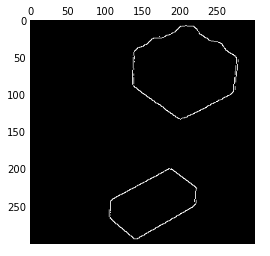

In [49]:
blur = cv2.blur(imgB, (5, 5))
canny = cv2.Canny(blur, 200, 250)
show(canny)